# <font color='black'> CREDIT DEFAULT CLASSIFICATION </font>
## <font color='black'> DSCI 100 - GROUP 85: GROUP PROJECT REPORT </font>

### <font color='navy'> I. Introduction </font>

This past year, Canada’s inflation rate reached a 30-year high of 5.7% (Evans, 2022). In turn, the increased cost of living has caused a 6.4% increase in credit balances (Senett, 2022). Without a comparable increase in wages, Canadians are at a greater risk of credit card default. Credit default occurs when an individual misses the minimum payment due for six months (Bucci, 2022). Credit default has vast ramifications including weak credit scores and lawsuits.

By exploring precursors to credit default, individuals become equipped to identify warning signs. The following question arises: **will an individual default on their credit payment?**

The “Default of Credit Card Clients” dataset from the UC Irvine Machine Learning Repository allows us to answer this question. It provides data on an individual’s age, sex, highest level of education obtained, marital status, amount of given credit (NTD), history of past payments, bill statement amounts (NTD), monthly payment amounts (NTD), and most importantly, whether this individual had defaulted. 

<img align="left" src="https://media.giphy.com/media/kt6rktnml8cPSdpHF9/giphy.gif" width = "400"/>

Source: https://media.giphy.com/media/kt6rktnml8cPSdpHF9/giphy.gif

### <font color='navy'> II. Methods and Results </font>

Prior to fitting a classification model, we performed a preliminary analysis to clean and wrangle the data while exploring relationships in the dataset.

#### <font color='green'> Exploratory Data Analysis

We begin by loading library packages and setting a seed.

In [1]:
install.packages("readxl")
install.packages("ggfortify")

library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(cowplot)
library(readxl)
library(ggfortify)

options(repr.matrix.max.rows = 6)
set.seed(1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr:

#### <font color='fushsia'> Read the Data </font>

We read the data from the web such that the original dataset with 30,000 rows and 25 columns appears as below in Table 1.

In [2]:
url1 <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

download.file(url1, destfile = "credit_default.xls")
credit_data <- read_excel("credit_default.xls", skip = 1)
credit_data 

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
29998,30000,1,2,2,37,4,3,2,-1,⋯,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,⋯,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,⋯,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


*Table 1: Original Dataset from the Web*

The data in each column of Table 1 is described below:
+ `LIMIT_BAL` -- the amount of credit (NTD) given to the individual by the credit company
+ `SEX` -- 1 = male; 2 = female 
+ `EDUCATION` -- 1 = graduate school; 2 = university; 3 = high school; 4 = other
+ `MARRIAGE` -- 1 = married; 2 = single; 3 = other
+ `AGE` -- (years)
+ `PAY_0:PAY_6` -- history of past payment, -1 = pay dult, 1 = payment delay for one month, 2 = payment delay for 2 months, etc.
+ `BILL_AMT1:BILL_AMT6` -- amount of the bill statement (NTD) from April 2005 to September 2005
+ `PAY_AMT1:PAY_AMT6` -- amount of previous payment (NTD) from April 2005 to September 2005

#### <font color='fushsia'> Clean and Wrangle the Data </font>

While the data is already tidy, there are still improvements to be made.

+ First, to provide viewers with a better understanding of the data, we rename the columns to demonstrate the specific month of the year it represents. These months were determined by the authors of the dataset.
+ In addition, we change the data type of the DEFAULT column from double to factor, as this is our target variable.
+ To enable faster run times without significantly sacrificing model accuracy, we select a sample of 15,000 rows for analysis.
+ Finally, to prepare for our predictive model, we split the data into training and testing sets

Table 2 below shows our training data set, with 11,249 rows and 25 columns:

In [3]:
set.seed(1)

#TIDY THE DATA
tidy_credit_data <- credit_data |>
                    rename(BILL_SEPT = BILL_AMT1,
                           BILL_AUG = BILL_AMT2,
                           BILL_JUL = BILL_AMT3,
                           BILL_JUN = BILL_AMT4,
                           BILL_MAY = BILL_AMT5,
                           BILL_APR = BILL_AMT6,
                           PAY_SEPT = PAY_AMT1,
                           PAY_AUG = PAY_AMT2,
                           PAY_JUL = PAY_AMT3,
                           PAY_JUN = PAY_AMT4,
                           PAY_MAY = PAY_AMT5,
                           PAY_APR = PAY_AMT6,
                           DEFAULT = "default payment next month") |>

                    mutate(DEFAULT= as_factor(DEFAULT)) |>
                    slice_sample(n = 15000) 


#SPLIT DATA INTO TRAINING AND TESTING SUBSETS
credit_split <- initial_split(tidy_credit_data,
                              prop = 0.75, 
                              strata = DEFAULT)
credit_train <- training(credit_split)
credit_test <- testing (credit_split)

credit_train

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17401,200000,2,1,1,49,-1,-1,-1,-1,⋯,950,0,1900,950,950,950,0,1900,950,0
24388,320000,1,1,1,40,-1,-1,-1,-1,⋯,8240,15273,16106,8240,8240,8240,15273,16106,9690,0
13218,320000,2,1,1,42,1,2,2,0,⋯,252323,253557,256525,10000,450,7025,7161,8000,6883,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
10831,10000,1,2,2,22,2,0,0,-1,⋯,528,0,0,1238,1275,528,0,0,0,1
25859,140000,2,2,1,37,-1,-1,-1,-1,⋯,1516,326,1439,326,326,1516,326,1439,326,1
14693,170000,1,2,1,34,1,2,2,2,⋯,64363,55912,54500,3400,0,3957,0,2200,1300,1


*Table 2: Training Dataset*

#### <font color='fushsia'> Summary Statistics </font>

To gain a better understanding of the dataset, we create a summary tables for both the target variable and potential predictor variables. The target variable summary tables are as below:

In [4]:
#SUMMARIZE DEFAULT/NON DEFAULT 

num_obs <- nrow(credit_train)
            credit_train |>
            group_by(DEFAULT) |>
            summarize(Count = n(), Percentage = n() / num_obs * 100)

DEFAULT,Count,Percentage
<fct>,<int>,<dbl>
0,8740,77.6958
1,2509,22.3042


*Table 3: Target Variable Summary Table on Categorical Data*

In [5]:
#CHECK FOR NA VALUES

missing_values <- data.frame(Number_of_Missing_Values = sum(is.na(credit_train)))
missing_values

Number_of_Missing_Values
<int>
0


*Table 4: Target Variable Summary Table on Missing Values*

Looking at Table 3 and Table 4, we see that:
+ 78% of credit card clients pay their bills, hence non-default (DEFAULT = 0)
+ 22% of clients default on their credit cards (DEFAULT = 1)
+ There are no missing values in the training data

While considering potential predictor variables, we notice that the bill statement amount and payment amount each month are inherently connected. If the bill statement amount and payment amounts are equal, it is unlikely for an individual to defualt as they would not owe the credit company anything. The relationship between bill statement amount and payment amount is explored below. To determine the average bill statement amount and the average payment amount each month: 

In [6]:
#SUMMARIZE BILL STATEMENT AMOUNT

average_summarize <- credit_train |>
                     select(BILL_SEPT:PAY_APR) |>
                     map_df(mean, na.rm=TRUE) 

average_summarize_bill <- average_summarize |>
                          pivot_longer(cols = BILL_SEPT:BILL_APR,
                                       names_to = "Month",
                                       values_to = "Mean_Amount") |>
                          select(Month:Mean_Amount)
average_summarize_bill

Month,Mean_Amount
<chr>,<dbl>
BILL_SEPT,52078.22
BILL_AUG,50029.63
BILL_JUL,48032.24
BILL_JUN,44312.64
BILL_MAY,41349.74
BILL_APR,39731.71


*Table 5: Average Bill Statement Amount each Month*

In [7]:
#SUMMARIZE PAYMENT
average_summarize_pay <- average_summarize |>
                         pivot_longer(cols = PAY_SEPT:PAY_APR,
                                      names_to = "Month",
                                      values_to = "Mean_Amount") |>
                         select(Month:Mean_Amount)
average_summarize_pay

Month,Mean_Amount
<chr>,<dbl>
PAY_SEPT,5788.625
PAY_AUG,5940.109
PAY_JUL,5254.558
PAY_JUN,4861.044
PAY_MAY,4661.477
PAY_APR,5126.886


*Table 6: Average Payment Amount each Month*

From Tables 5 and 6, we observe that the mean bill amount is higher than the mean payment amount each month. While this data is the average across all individuals in the dataset, it implies that there are people who are either not making payments at all or are not paying their credit card bills in full. As such, this is a good indication that bill statement amounts and payment amounts can predict whether an individual will default as it is obvious that some individuals face credit debt.

#### <font color='fushsia'> Visualization </font>

To further explore the relationship between bill statement amount, payment amount, and whether an individual will default, we create several scatter plots with an x-axis of monthly bill statements, a y-axis of monthly payment amounts, and a colour mapping to Default (1) or Non-Default (0).

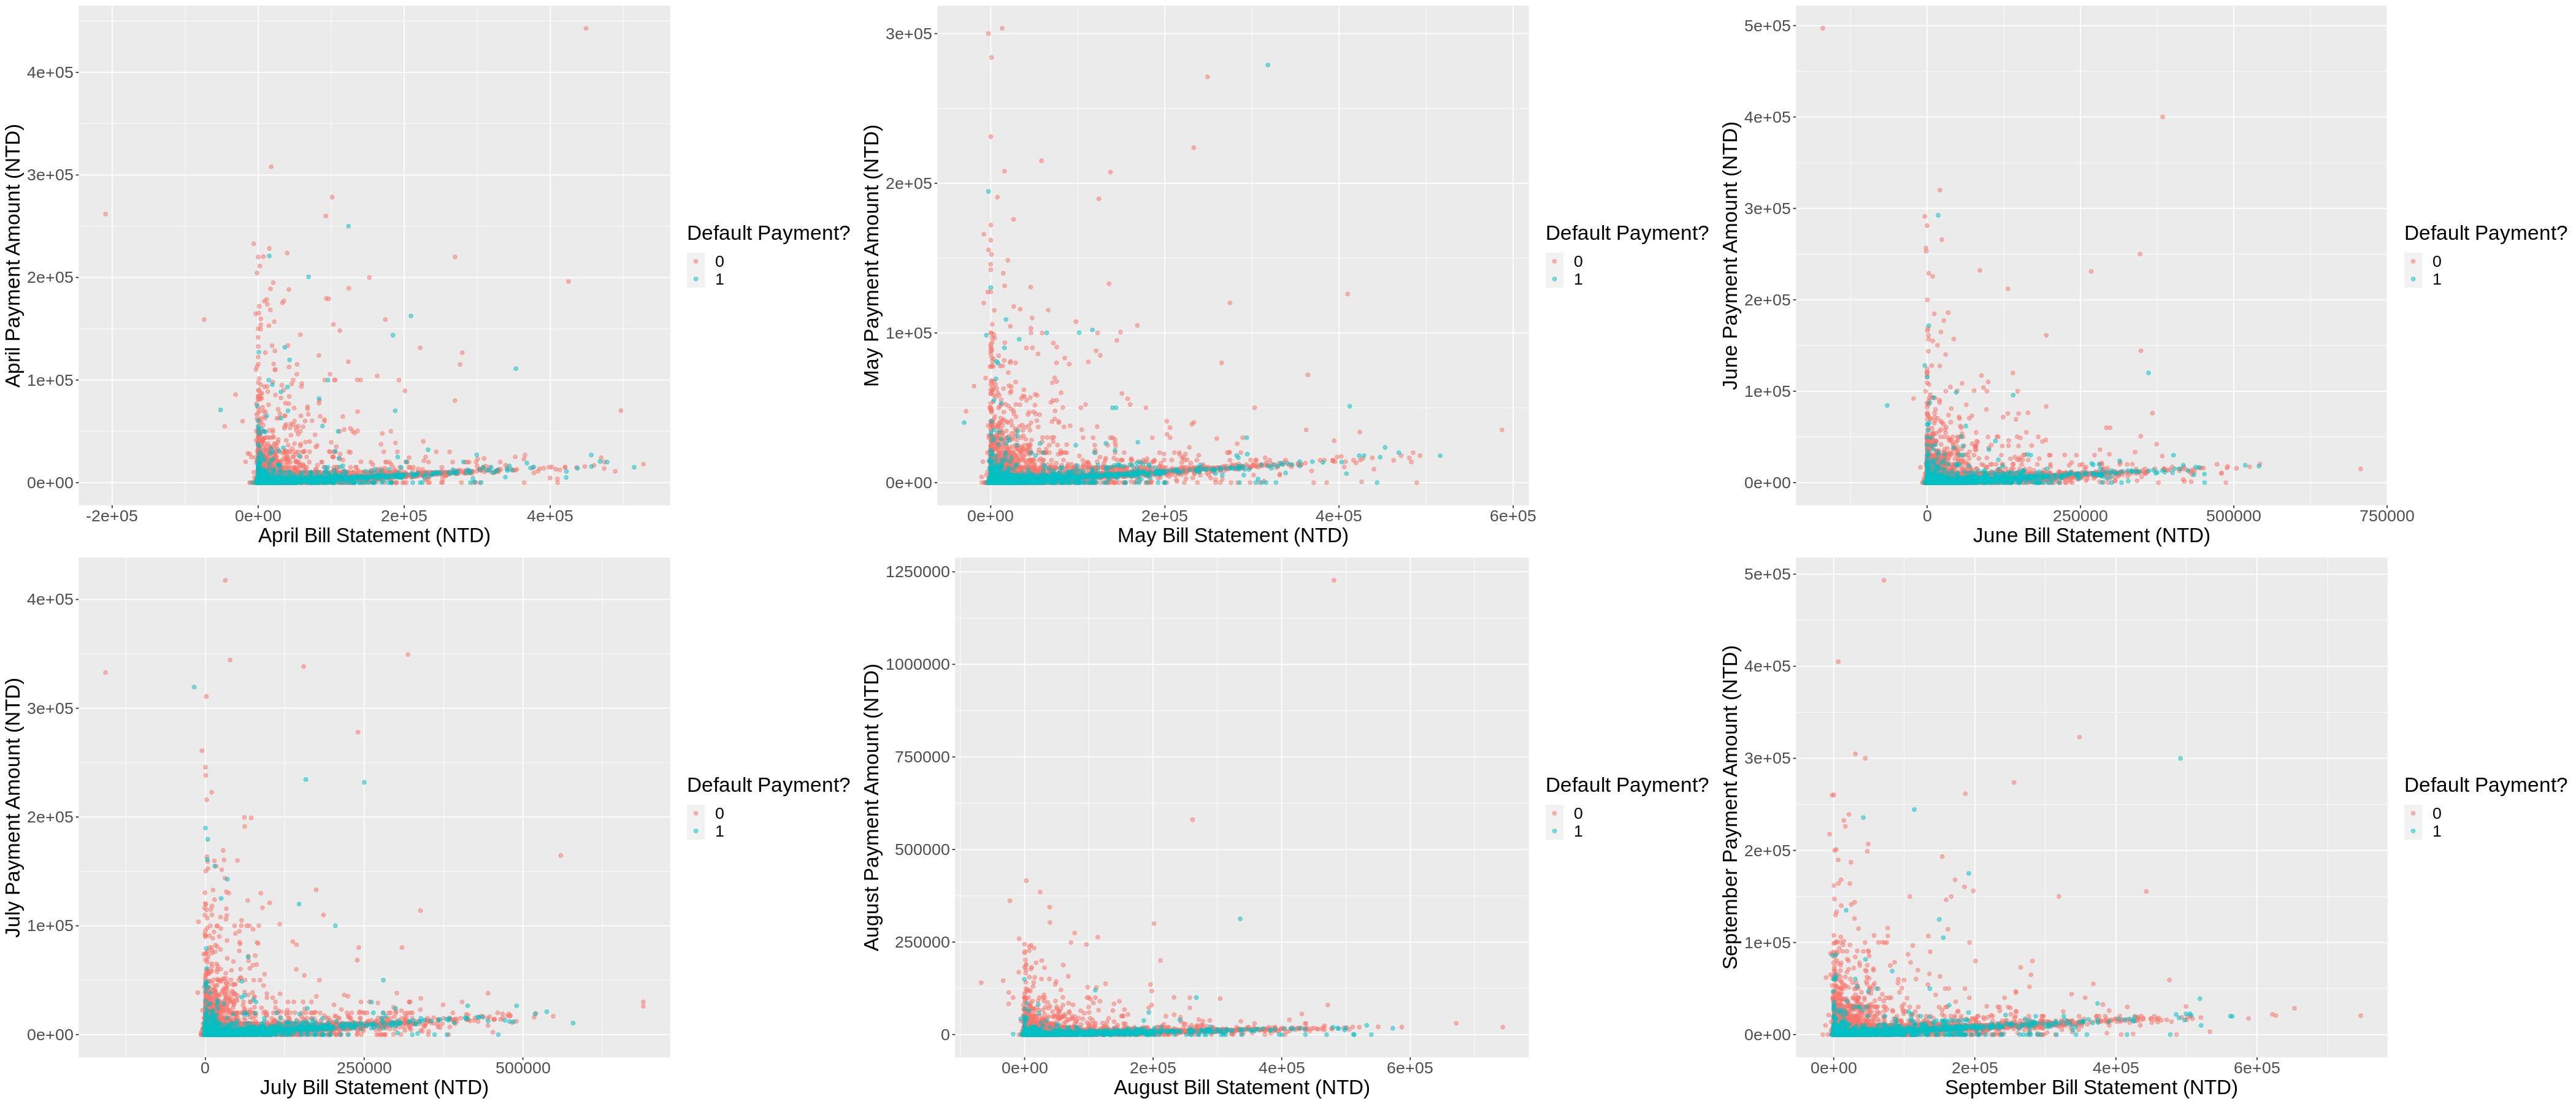

In [8]:
options(repr.plot.width = 35, repr.plot.height = 15)

#VISUALIZING ONE MONTH'S BILL STATEMENT AMOUNT AND PAYMENT AMOUNT

sept_bill_vs_payment <- credit_train |>
                        ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = DEFAULT)) +
                        geom_point(alpha = 0.5) +
                        labs(x = "September Bill Statement (NTD)", 
                             y = "September Payment Amount (NTD)", 
                             color = "Default Payment?") +
                        theme(text = element_text(size = 20))

aug_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_AUG, y = PAY_AUG, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "August Bill Statement (NTD)", 
                            y = "August Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

jul_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_JUL, y = PAY_JUL, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "July Bill Statement (NTD)", 
                            y = "July Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

jun_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_JUN, y = PAY_JUN, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "June Bill Statement (NTD)", 
                            y = "June Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

may_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_MAY, y = PAY_MAY, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "May Bill Statement (NTD)", 
                            y = "May Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

apr_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_APR, y = PAY_APR, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "April Bill Statement (NTD)", 
                            y = "April Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

#COMPARING ALL SIX MONTHS BESIDE ONE ANOTHER
plot_grid(apr_bill_vs_payment, may_bill_vs_payment,
          jun_bill_vs_payment, jul_bill_vs_payment,
          aug_bill_vs_payment, sept_bill_vs_payment,
          label_size = 12)

*Figure 1: Scatter Plots of Bill Statement Amount versus Payment Amount for each Month*

From Figure 1, it appears that credit defaulting occurs more often when clients make low payment amounts and when the bill statement amount is less than $25,000 NTD. These trends appear across all six months of data. As each month shows a similar trend, we choose to use the July, August, and September as our predictor variables for two reasons. First, as each month passes without a payment made, it becomes more difficult to catch-up. Therefore, analyzing just the latter half of a six-month period is more representative of whether an individual will default. Considering three of six months disregards singular, outlying missed payments and instead tracks the amount of debt an individual has amassed over time. Moreover, reducing the number of predictors ensures that R can process the model in a timely manner.


Performing this exploratory analysis demonstrates the inbalance between bill statement amounts and payment amounts every month. The visualization in Figure 1 reveals the relationship between this inbalance and its effects on the distribution of default and non-default. Therefore, we will use the predictor variables of `BILL_JUL`, `BILL_AUG`, `BILL_SEPT`, `PAY_JUL`, `PAY_AUG`, and `PAY_SEPT` to predict the target variable of `DEFAULT`. As an individual can either default or not, there are two categories that exist. As such, fitting a classification model allows us to predict a new category for unseen observations. Specifically, we will perform a binary classification to determine whether an individual will default using the K-nearest neighbours algorithm. 

#### <font color='green'> Data Analysis

We begin the data analysis by performing cross validation of 5 folds to select an optimal K value for our knn-classification model.

#### <font color='fushsia'> Cross Validation </font>

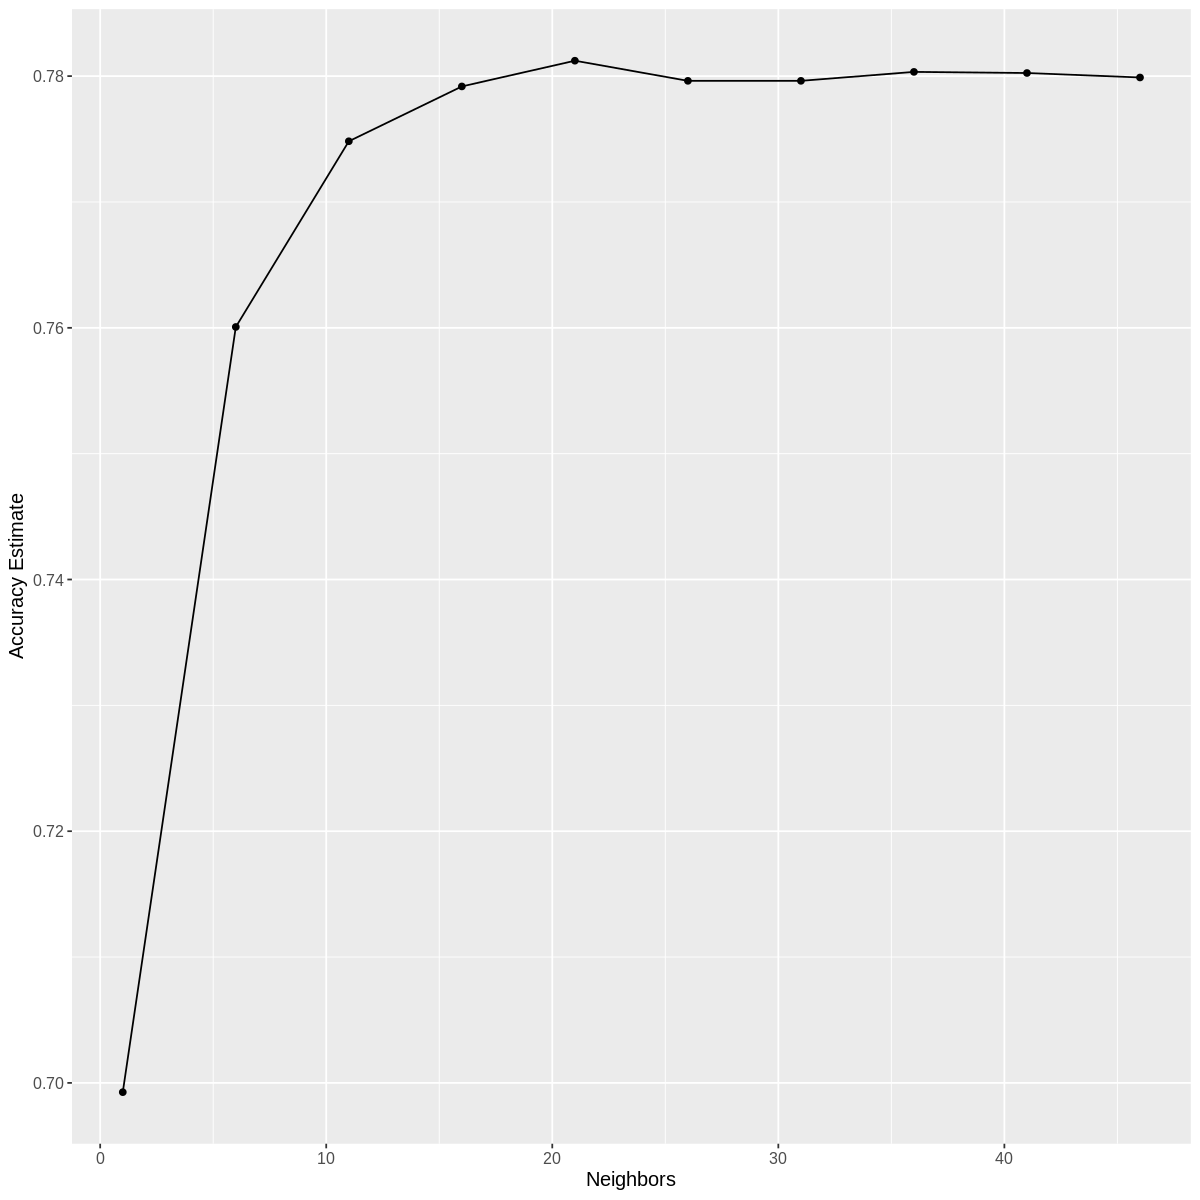

In [9]:
options(repr.plot.height = 10, repr.plot.width = 10)
set.seed(1)

credit_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
               set_engine("kknn") |>
               set_mode("classification")

credit_vfold <- vfold_cv(credit_train, v = 5, strata = DEFAULT)

credit_recipe <- recipe(DEFAULT ~ BILL_JUL + BILL_AUG + BILL_SEPT
                        + PAY_JUL + PAY_AUG + PAY_SEPT, data = credit_train) |>
                 step_scale(all_predictors()) |>
                 step_center(all_predictors())

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 5))

credit_validation_fit <- workflow() |>
              add_recipe(credit_recipe) |>
              add_model(credit_spec) |>
              tune_grid(resamples = credit_vfold, grid = k_vals) |>
              collect_metrics() 

accuracies <- credit_validation_fit |>
              filter(.metric == "accuracy")


accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                 geom_point() +
                 geom_line() +
                 labs(x = "Neighbors", y = "Accuracy Estimate") + 
                 theme(text = element_text(size = 12))

accuracy_vs_k

*Figure 2: Plot of Accuracy versus the Number of Neighbors*

By Figure 2, we choose the number of neighbours to be 26 as it is between K = 20 and K = 50, such that we get roughly optimal accuracy, changing the K value to a nearby K value doesn't affect accuracy greatly and because the number of neighbours is low enough that running the model isn't very expensive.

With the chosen K value, we build our classification model using the same recipe as created during cross validation.

#### <font color='fushsia'> Model Building  </font>

In [10]:
set.seed(1)

credit_model_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 26) |>
              set_engine("kknn") |>
              set_mode("classification")

credit_model_fit <- workflow() |>
             add_recipe(credit_recipe) |>
             add_model(credit_model_spec) |>
             fit(data = credit_train)

credit_predictions <- predict(credit_model_fit, credit_test) |>
                      bind_cols(credit_test) 

credit_metrics <- credit_predictions |>
                  metrics(truth = DEFAULT, estimate = .pred_class) |>
                  filter(.metric == "accuracy")
credit_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7816582


*Table 7: Accuracy of the Classification Model*

Table 7 shows that our model has an accuracy of 78%, meaning that it predicts whether an individual defaults correctly 78% of the time. To determine how the model predicts new labels, we find and plot the confusion matrix. 

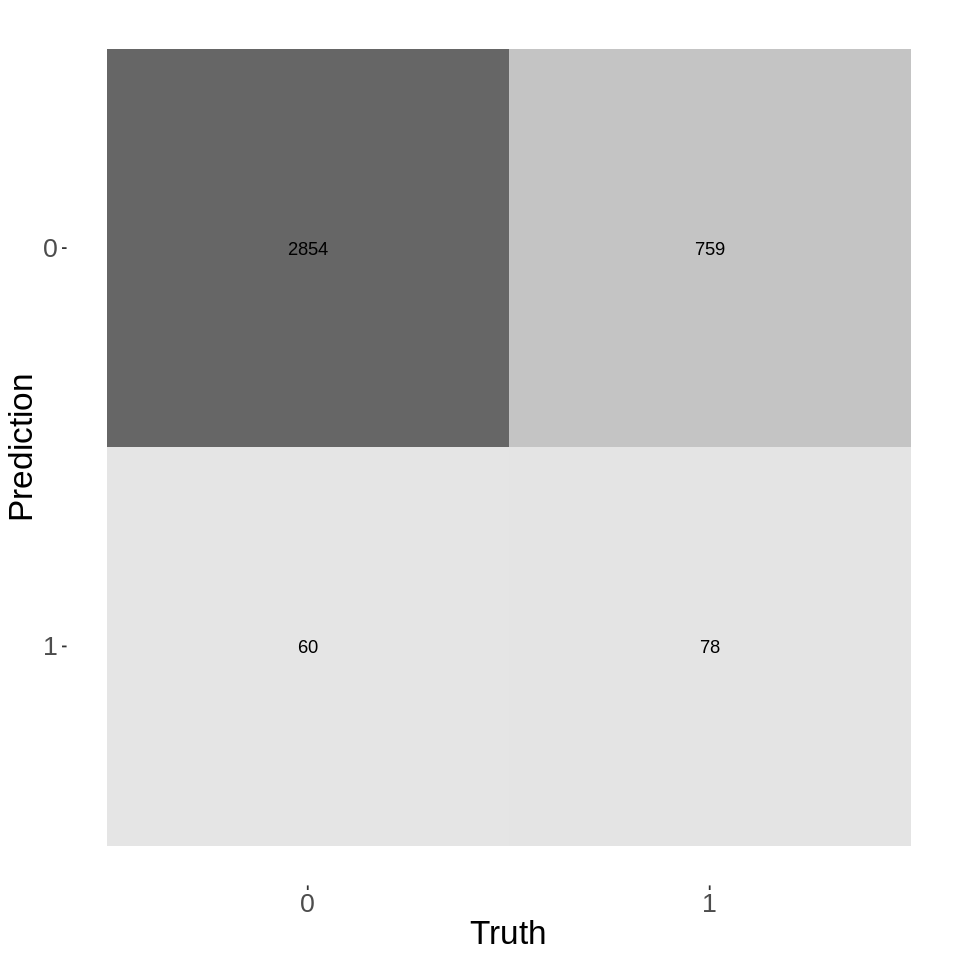

In [11]:
options(repr.plot.width = 8, repr.plot.height = 8)

credit_conf_mat <- credit_predictions |>
                   conf_mat(truth = DEFAULT, estimate = .pred_class)

autoplot(credit_conf_mat, type = "heatmap") + 
theme(text = element_text(size = 20))

*Figure 3: Confusion Matrix Plot of the Model*

Looking at Figure 3, we see that the model predicts that an individual does not default more often than default. This is represented by the confusion matrix visualization as well. It is a heat map, where predictions that occur most often are the darkest shades. Specifically, the model predicts that an individual will not default 96% of the time, calculated by dividing the total number of non-default predictions by the total number of predictions.

#### <font color='fushsia'> Classification Visualization </font>

To visualize the results of the classifier, we create scatterplots of the month's bill statement amount compared to its payment amount, with a colour mapping to whether or not the prediction was correct. We accomplish this by first adding a new column named `PREDICTION_RESULT` to the `credit_predictions` dataframe. In this new column, "true" means that the classifier correctly predicted whether an individual will default and "false" means that the classifier was incorrect. 

In [12]:
credit_predictions_result <- credit_predictions |>
                             mutate(PREDICTION_RESULT = ifelse(.pred_class == DEFAULT, "true","false"))
credit_predictions_result

.pred_class,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,⋯,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT,PREDICTION_RESULT
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0,26753,120000,1,1,2,28,0,0,0,⋯,49722,48898,3000,3000,2000,2000,2000,3000,0,true
0,8462,100000,2,2,2,27,0,0,0,⋯,48372,49412,2400,1776,3800,0,2000,1800,0,true
0,4050,160000,1,2,1,40,-1,-1,-1,⋯,0,0,2941,0,0,0,0,0,0,true
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,28112,210000,2,2,1,36,0,0,0,⋯,16069,13780,1534,1307,1116,437,399,276,0,true
0,25109,230000,1,2,1,60,0,0,0,⋯,124474,120570,6057,4845,4291,4115,4274,4054,0,true
0,29335,100000,1,1,2,27,0,0,0,⋯,12429,22315,1171,1303,1023,360,10000,442,0,true


*Table 8: Predictions Table with New Result Column*

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


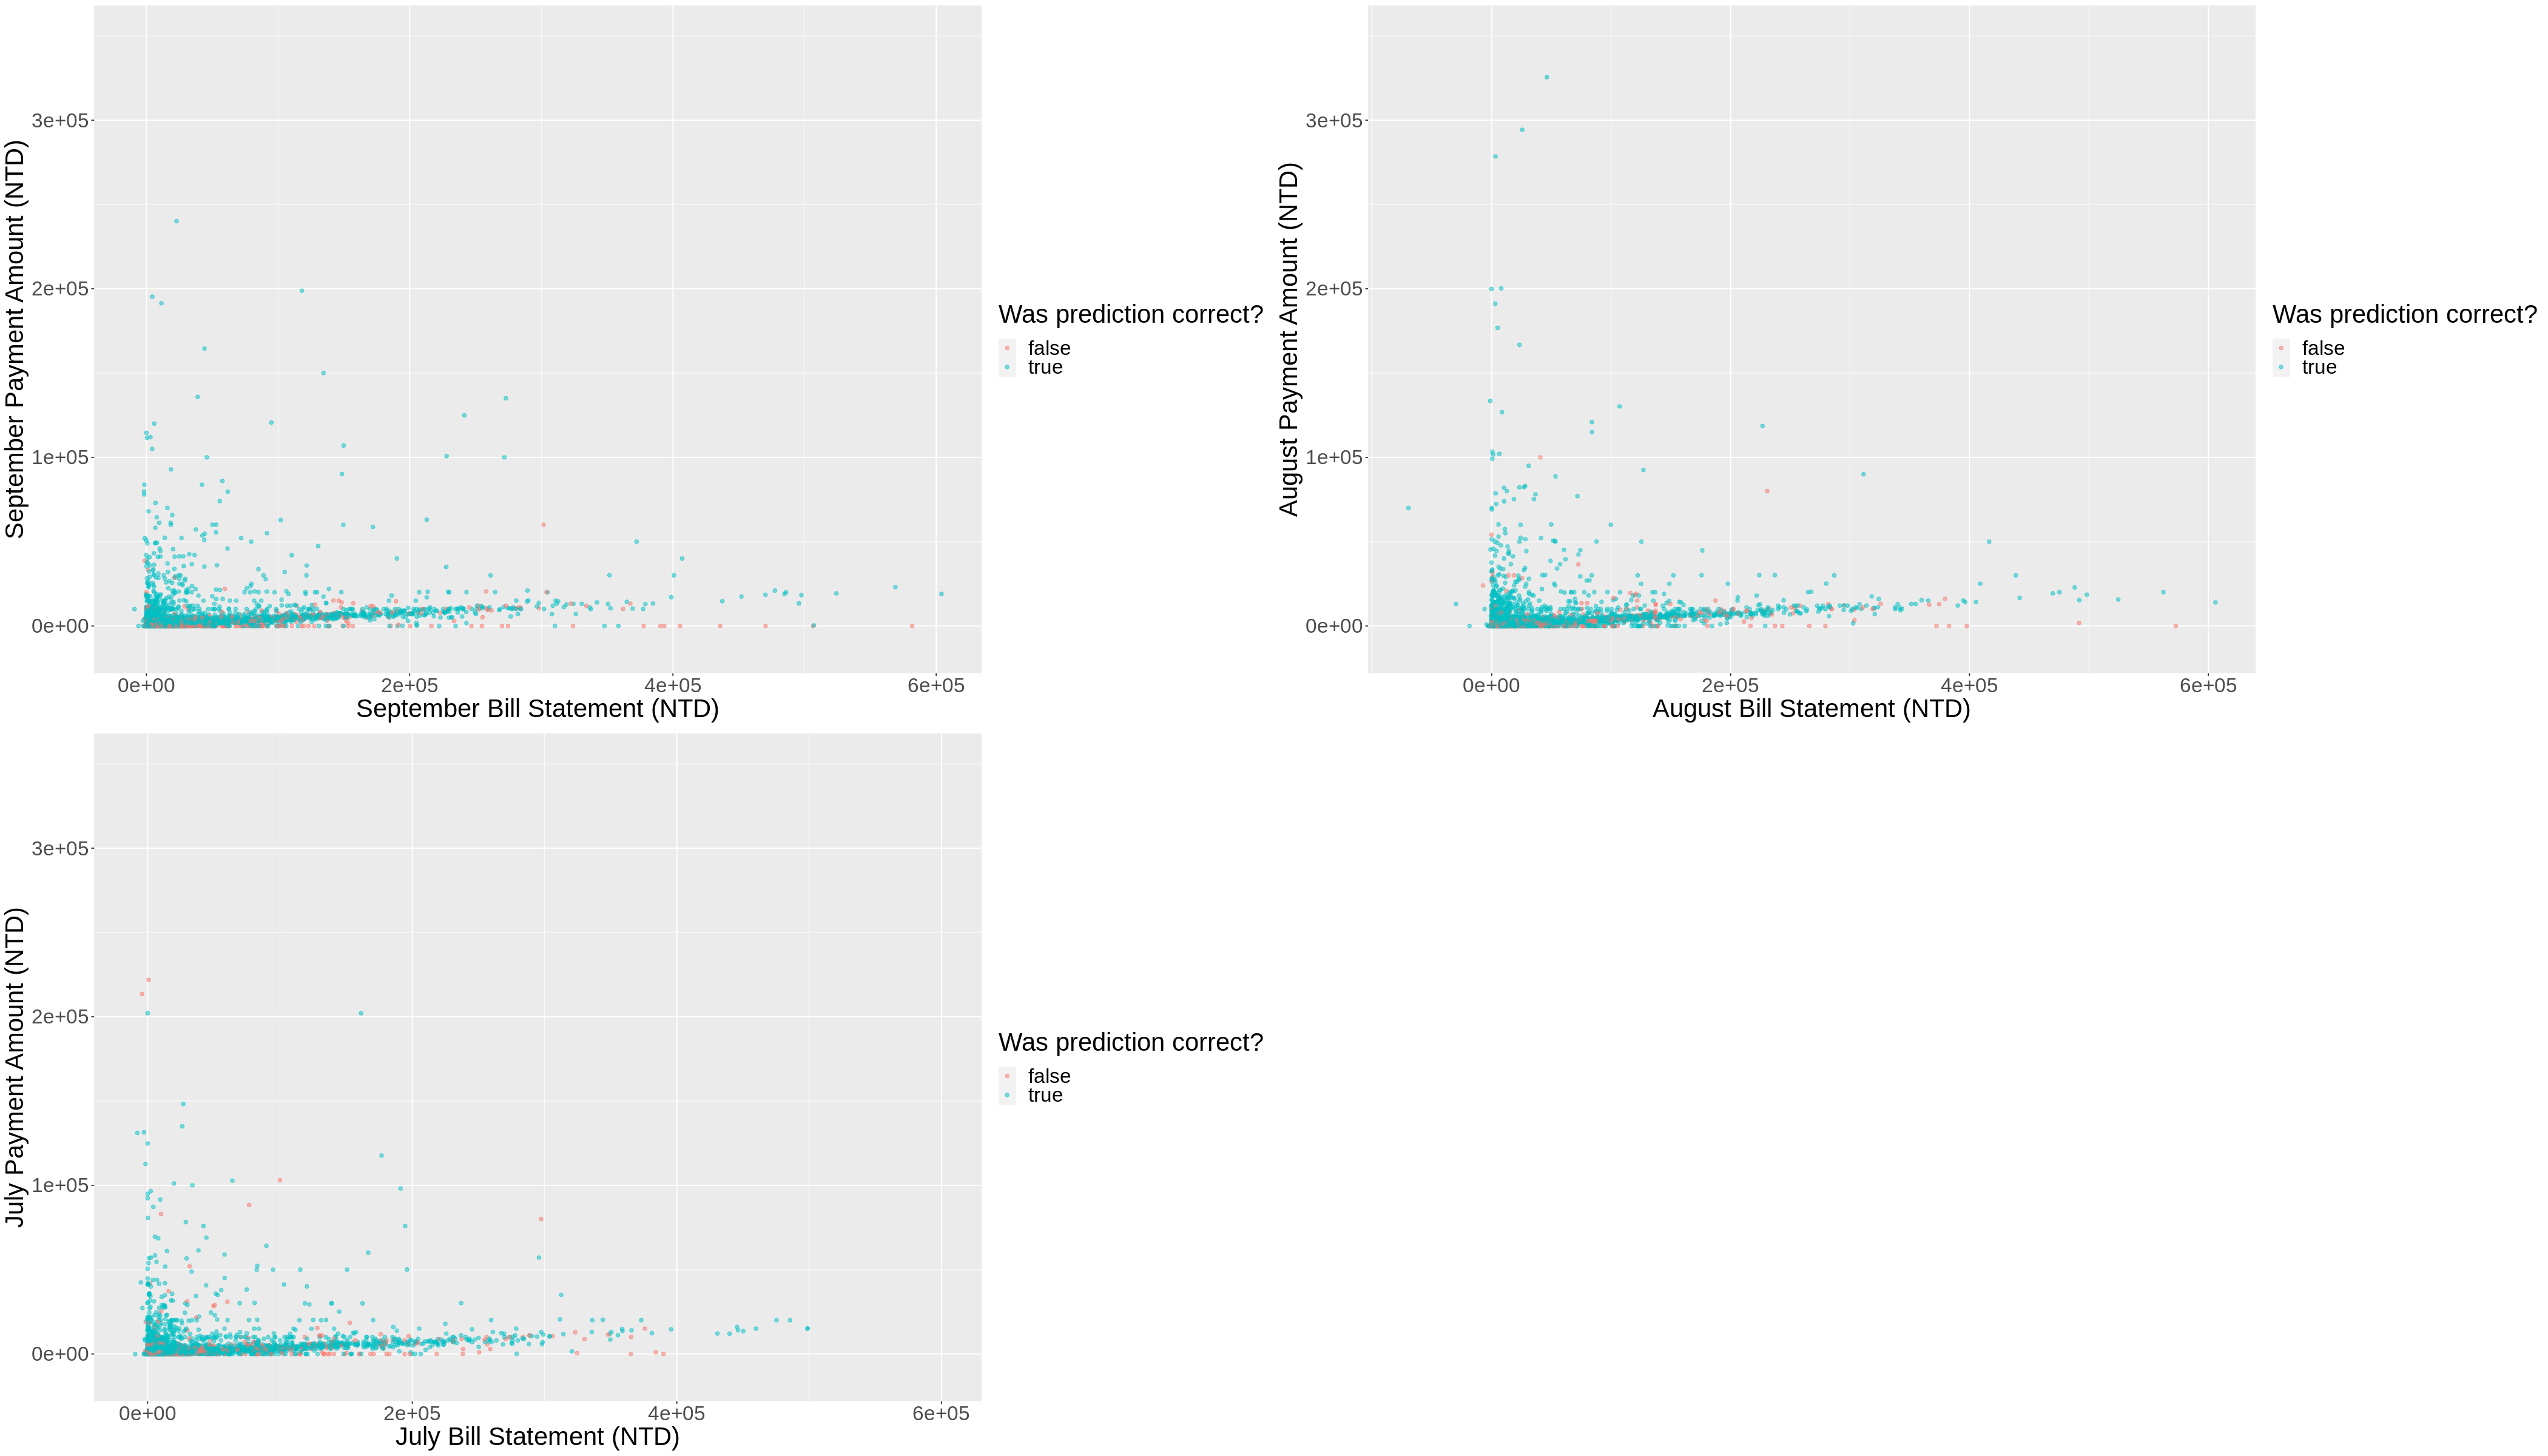

In [13]:
#VISUALIZATION

options(repr.plot.width = 35, repr.plot.height = 20)

sept_bill_vs_payment_result <- credit_predictions_result |>
                               ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = PREDICTION_RESULT)) +
                               geom_point(alpha = 0.5) +
                               labs(x = "September Bill Statement (NTD)", 
                                    y = "September Payment Amount (NTD)", 
                                    color = "Was prediction correct?") +
                               ylim(c(-10000, 350000)) +
                               theme(text = element_text(size = 25))

aug_bill_vs_payment_result <- credit_predictions_result |>
                              ggplot(aes(x = BILL_AUG, y = PAY_AUG, color = PREDICTION_RESULT)) +
                              geom_point(alpha = 0.5) +
                              labs(x = "August Bill Statement (NTD)", 
                                   y = "August Payment Amount (NTD)", 
                                   color = "Was prediction correct?") +
                              ylim(c(-10000, 350000)) +
                              theme(text = element_text(size = 25))

july_bill_vs_payment_result <- credit_predictions_result |>
                               ggplot(aes(x = BILL_JUL, y = PAY_JUL, color = PREDICTION_RESULT)) +
                               geom_point(alpha = 0.5) +
                               labs(x = "July Bill Statement (NTD)", 
                                    y = "July Payment Amount (NTD)", 
                                    color = "Was prediction correct?") +
                               xlim(c(-10000, 600000)) +
                               ylim(c(-10000, 350000)) +
                               theme(text = element_text(size = 25))

plot_grid(sept_bill_vs_payment_result,
          aug_bill_vs_payment_result,
          july_bill_vs_payment_result,
          label_size = 40)

*Figure 4: Scatter Plots on the Correctness of the Predictions*

Figure 4 above shows that the majority of observations are accurately predicted by the classifier, pictured in blue. The model is able to predict whether an individual defaults more accurately when payment amounts are high. Incorrect predictions occur most often when both bill statement amount and payment amounts are low.

### <font color='navy'> III. Discussion </font>

Overall we found that the model has an accuracy of 78%. By Figure 4, we notice that the model is often able to accurately predict new labels for unseen observations with high payment amounts. Conversely, it is more difficult for the model to predict whether an individual defaults at low bill statment and payment amounts. This is likely due to the many overlapping observations in the lower left area of the graph. As the K-nearest neighbours algorithm relies on a Euclidean distance measure, it is sensitive to changes in regions of high data point concentration. In turn, this causes the accuracy of the model to decrease. 

An accuracy score of 78% can also be explained by the class imbalance in the dataset. As per Table 3, 78% of the labels in the dataset are non-default. When more observations are non-default, it may influence the model to predict non-default more often, as a majority vote of the nearby neighbours occurs in KNN classification.

It is also likely that more than just bill statement and payment amounts affect whether an individual defaults. Variables such as age, credit limit, and education may play a role as well. Therefore, the use of just two types of predictor variables can negatively affect the accuracy of this model, as it is an oversimplification of dynamic phenomenon.

Furthermore, by the confusion matrix in Figure 3, we see that the model predicts non-default 96% of the time. Comparing the proportion of non-default the model predicts and the true proportion reveals the fallacy of the model. As the model predicts non-default 96% of the time compared to a 78% proportion of non-default in the dataset, it is not accurate enough to be implemented in the financial industry. Moreover, comparing the model's accuracy of 78% to the majority classifier that is 78% as well, we see that the model does not peform exceptionally. This model does not improve upon the majority classifier, and therefore does not work well enough for application in the credit industry. However, the model can still be useful as a preliminary screening to determine that individuals with high payment amounts are unlikely to default. 

Determining whether an individual may default can help both credit card clients and financial institutions identify warning signs to credit default. In turn, this allows individuals to plan ahead and assists financial institutions in risk assessment. An accurate prediction can help balance risk and return for banks, and alerting them to charge higher rates for those posing higher risk, or even deny new credit cards when required.

This project explores just one of many aspects of credit default and the credit industry, thereby leading to the future questions of:

- How do categorical variables of sex, education, and marital status affect whether an individual defaults?
- How does payment history affect future payment amounts?
- How do bill statement and monthly payment amounts affect an individual's credit limit when applying for new credit cards?


### <font color='navy'> References

Bucci, S. (2022, April 26). Credit card default: What to do about it. Bankrate. Retrieved October 25, 2022, from https://www.bankrate.com/finance/credit-cards/credit-card-default/ 

Evans, P. (2022, March 16). Canada's inflation rate now at 30-year high of 5.7%. CBCnews. Retrieved October 25, 2022, from https://www.cbc.ca/news/business/canada-inflation-february-1.6386536 

Glesener, L. (n.d.). Confusion matrix – Model wvaluation and performance Metrics with yardstick – Quantargo. Quantargo. Retrieved December 1, 2022, from https://www.quantargo.com/courses/course-r-machine-learning-tidymodels/04-model-evaluation-performance-metrics-yardstick/03-classification-confusion-matrix/section-confusion-matrix

Plotting time series in R (for Prof. Scott). (n.d.). AWS. Retrieved December 1, 2022, from https://rstudio-pubs-static.s3.amazonaws.com/325621_fe5c68d1df274c6b8b287428bb484698.html

Senett, K. (2022, September 23). How much credit card debt does the average Canadian have? MoneySense. Retrieved October 25, 2022, from https://www.moneysense.ca/save/debt/how-much-credit-card-debt-does-the-average-canadian-have/ 

Wilke, C. O. (2020, December 15). Introduction to cowplot. R/CRAN. Retrieved October 25, 2022, from https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html

Yeh, I.-C. (2009). Default of Credit Card Clients Data Set. UCI Machine Learning Repository. Retrieved October 25, 2022, from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 